In [1]:
from utils import unpack_dataset, SquadDS, add_answer_end, define_token_position, load_model
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.cm as cm
sns.set_theme()


/Users/dicaristic/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_ds = load_dataset('squad', split='train')
test_ds = load_dataset('squad', split='validation')
df1 = pd.DataFrame(train_ds)
df2 = pd.DataFrame(test_ds)


Found cached dataset squad (/Users/dicaristic/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)
Found cached dataset squad (/Users/dicaristic/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


In [3]:
unique_topics = df1.title.unique()

In [4]:
topic_counts= df1['title'].value_counts().sort_values(axis = 0)
topic_counts_df = topic_counts.reset_index().rename(columns = {'index':'topic', 'title': 'count'})

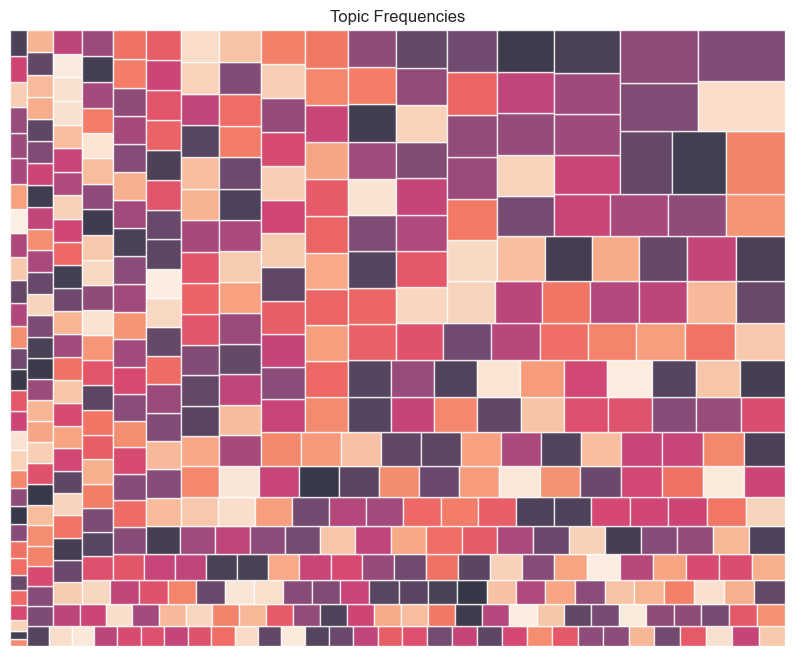

In [5]:
# Prepare the data for the treemap
labels = topic_counts.index
sizes = topic_counts.values

# Prepare the data for the treemap
labels = topic_counts.index
sizes = topic_counts.values

# Create the treemap using squarify
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, alpha=0.8)

# Add title and axis labels
plt.title('Topic Frequencies')
plt.axis('off')

# Show the plot
plt.show()

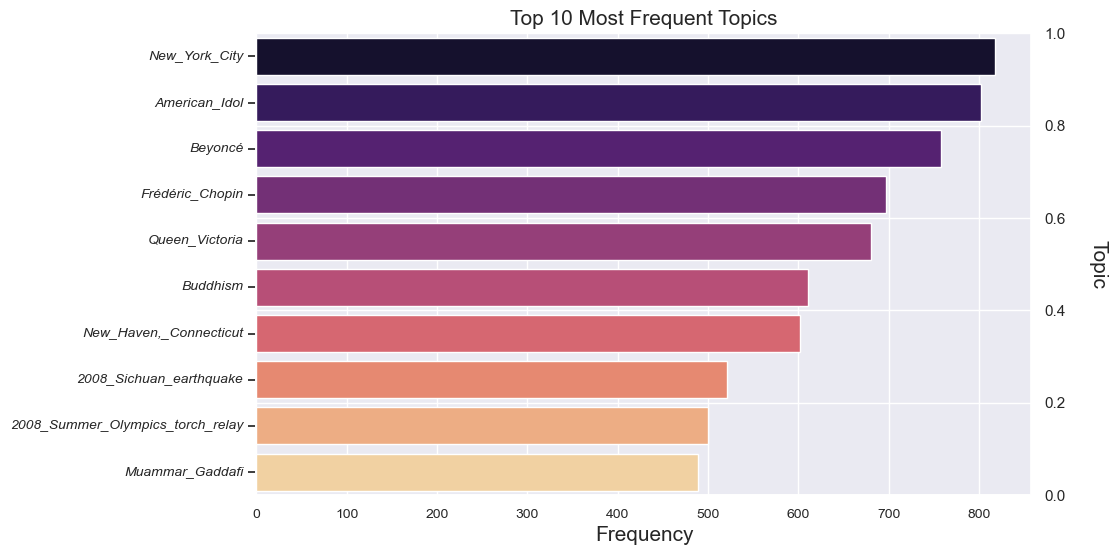

In [6]:

top10= df1['title'].value_counts().nlargest(10)
# Create a color palette with a gradient effect
color_palette = sns.color_palette('magma', len(top10))

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(x=top10.values, y=top10.index, palette=color_palette)

# Add labels and title
plt.xlabel('Frequency', fontsize = 15)
#plt.ylabel('Topic', fontsize = 15)
plt.title('Top 10 Most Frequent Topics', fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, fontstyle='italic', rotation=0, va='center')
ax2 = plt.twinx()

# Set the ylabel for the secondary y-axis on the right side
ax2.set_ylabel('Topic', fontsize=15, rotation=-90, labelpad=30)
ax2.tick_params(axis='y', left=False, right=False, labelleft=False, labelright=True)
ax2.spines['right'].set_visible(False)

# Show the plot
plt.show()

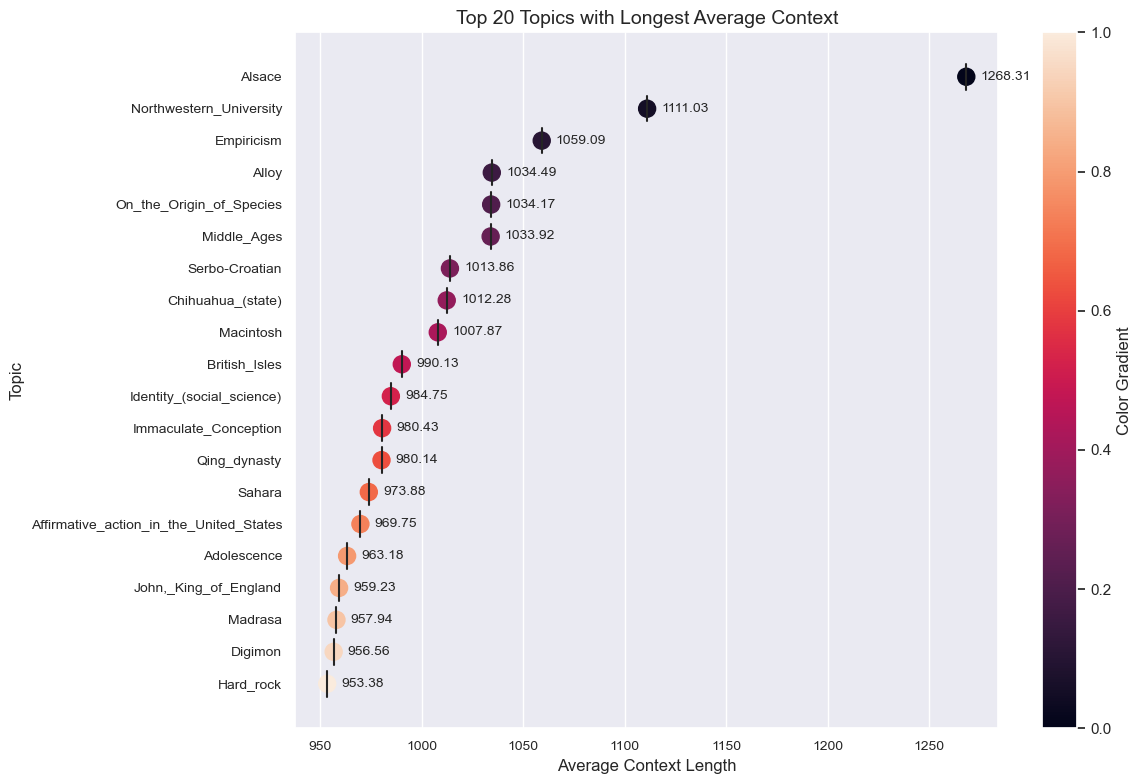

In [7]:
import numpy as np
topic_avg_context_length = df1.groupby('title')['context'].apply(lambda x: x.str.len().mean()).nlargest(20)

# Sort the topics by the average context length
sorted_topics = topic_avg_context_length.sort_values().index

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal violin plot
sns.violinplot(y=sorted_topics, x=topic_avg_context_length.values, palette='viridis', inner=None, ax=ax, orient='h')

# Add scatter plot for individual points with color gradient
colors = np.linspace(0, 1, len(sorted_topics))
scatter = ax.scatter(y=sorted_topics, x=topic_avg_context_length.values, c=colors, cmap='rocket', s=150)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Color Gradient', fontsize=12)

# Customize the plot
ax.set_ylabel('Topic', fontsize=12)
ax.set_xlabel('Average Context Length', fontsize=12)
ax.set_title('Top 20 Topics with Longest Average Context', fontsize=14)
ax.set_yticks(range(len(sorted_topics)))
ax.set_yticklabels(sorted_topics)
ax.tick_params(axis='both', labelsize=10)

# Add text next to scatter points with an offset to the right
offset = 7
for x, y, length in zip(topic_avg_context_length.values, scatter.get_offsets()[:, 1], topic_avg_context_length.values):
    ax.text(x + offset, y, f'{length:.2f}', va='center', ha='left', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
df1.title.describe()

count             87599
unique              442
top       New_York_City
freq                817
Name: title, dtype: object

In [9]:
df1.context.describe()

count                                                 87599
unique                                                18891
top       In 1853, Victoria gave birth to her eighth chi...
freq                                                     25
Name: context, dtype: object

In [10]:
df1.head()

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...
